Similar to MAD, but simpler. LevelShiftAD detects shift of value level by tracking the difference between median values at two sliding time windows next to each other. It is not sensitive to instantaneous spikes and could be a good choice if noisy outliers happen frequently.

Documentation:
https://adtk.readthedocs.io/en/stable/notebooks/demo.html#LevelShiftAD

In [60]:
import pandas as pd
import matplotlib.pyplot as plot

In [77]:
s = pd.read_csv('./sample_data/cpu.csv')
s.drop(['label'], axis=1, inplace=True)
s.head()

,timestamp,value
0,1469376000,0.847300
1,1469376300,-0.036137
2,1469376600,0.074292
3,1469376900,0.074292
4,1469377200,-0.036137


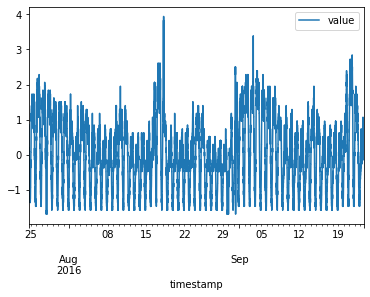

In [145]:
s.plot()

In [78]:
s["timestamp"] = pd.to_datetime(s["timestamp"], unit='s')
s = s.set_index("timestamp")
s.head()

,value
timestamp,
2016-07-24 16:00:00,0.847300
2016-07-24 16:05:00,-0.036137
2016-07-24 16:10:00,0.074292
2016-07-24 16:15:00,0.074292
2016-07-24 16:20:00,-0.036137


In [79]:
from adtk.data import validate_series
# This functoin will check some common critical issues of time series that may cause problems if anomaly detection is performed without fixing them. The function will automatically fix some of them and raise errors for the others.
# Issues will be checked and automatically fixed include:
# Time index is not monotonically increasing;
# Time index contains duplicated time stamps (fix by keeping first values);
# (optional) Time index attribute freq is missed while the index follows a frequency;
# (optional) Time series include categorical (non-binary) label columns (to fix by converting categorical labels into binary indicators).

s = validate_series(s)

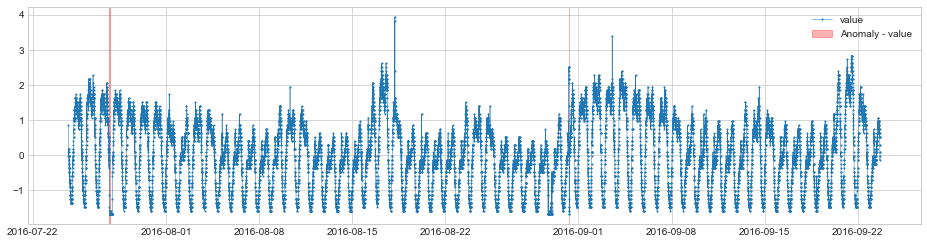

In [146]:
from adtk.detector import LevelShiftAD
from adtk.visualization import plot
# c (float, optional) – Factor used to determine the bound of normal range based on historical interquartile range. Default: 6.0.
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=12)
anomalies = level_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

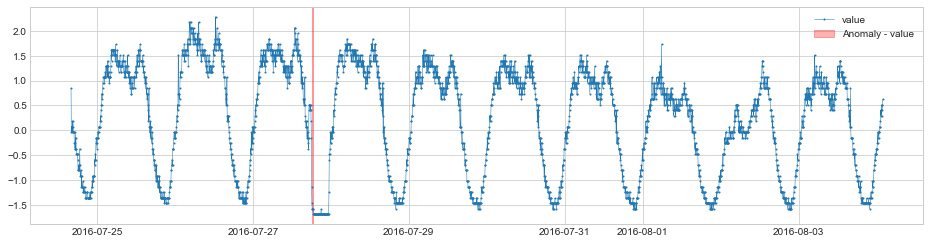

In [147]:
plot(s[0:3000], anomaly=anomalies[0:3000], anomaly_color='red');

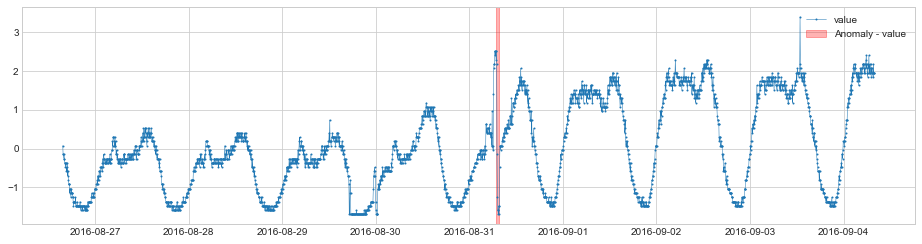

In [148]:
plot(s[9500:12000], anomaly=anomalies[9500:12000], anomaly_color='red');